In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')
data.columns = data.columns.str.strip()
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
datasets = data.copy()

# Drop the 'Loan_ID' column as it is not useful for prediction
datasets= datasets.drop(columns=['loan_id'],axis=1)
print(datasets)

      no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8 

In [4]:
cols_to_encode = ['education', 'self_employed', 'loan_status']
le = LabelEncoder()
for col in cols_to_encode:
    datasets[col] = le.fit_transform(datasets[col].str.strip())  # Strip spaces before encoding

datasets.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [5]:
missing_rate = 0.1
threshold = datasets['income_annum'].median()
mask = datasets['income_annum']< threshold
missing_index = datasets[mask].sample(frac = missing_rate, random_state=42).index
datasets.loc[missing_index, ['cibil_score']] = np.nan
datasets 

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778.0,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417.0,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506.0,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467.0,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382.0,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317.0,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559.0,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457.0,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780.0,8200000,700000,14100000,5800000,0


In [6]:
#print(datasets.isnull().sum())
missing_indices = datasets[datasets['cibil_score'].isna()].index
y_TEST = data.loc[missing_indices, 'cibil_score']
print(y_TEST)

64      784
105     841
117     647
135     425
137     382
       ... 
4199    811
4213    737
4228    483
4244    860
4246    871
Name: cibil_score, Length: 212, dtype: int64


In [7]:
missing_data = datasets[datasets['cibil_score'].isna()]
missing_data


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
64,4,0,1,3900000,12300000,18,NaN,7600000,6900000,13100000,2800000,0
105,3,1,1,4200000,9700000,16,NaN,7800000,300000,16700000,5100000,0
117,0,1,0,600000,1600000,6,NaN,1500000,600000,1500000,700000,0
135,3,0,0,1600000,5500000,12,NaN,600000,800000,5400000,900000,1
137,5,1,1,2200000,6700000,6,NaN,4400000,1300000,8600000,1100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4199,5,1,0,600000,2000000,20,NaN,300000,400000,1900000,600000,0
4213,2,1,1,3200000,9700000,6,NaN,7300000,3500000,9700000,2600000,0
4228,1,0,1,3200000,9300000,6,NaN,6700000,1900000,7800000,3600000,1
4244,3,1,0,1800000,5600000,20,NaN,1900000,1700000,4300000,900000,0


In [8]:
non_missing_data = datasets[datasets['cibil_score'].notna()]
non_missing_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778.0,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417.0,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506.0,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467.0,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382.0,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317.0,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559.0,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457.0,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780.0,8200000,700000,14100000,5800000,0


In [9]:
cols = [col for col in datasets.columns if col !='cibil_score'] + ['cibil_score']
missing_data = missing_data[cols]
non_missing_data = non_missing_data[cols]
non_missing_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score
0,2,0,0,9600000,29900000,12,2400000,17600000,22700000,8000000,0,778.0
1,0,1,1,4100000,12200000,8,2700000,2200000,8800000,3300000,1,417.0
2,3,0,0,9100000,29700000,20,7100000,4500000,33300000,12800000,1,506.0
3,3,0,0,8200000,30700000,8,18200000,3300000,23300000,7900000,1,467.0
4,5,1,1,9800000,24200000,20,12400000,8200000,29400000,5000000,1,382.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,2800000,500000,3300000,800000,1,317.0
4265,0,1,1,3300000,11300000,20,4200000,2900000,11000000,1900000,0,559.0
4266,2,1,0,6500000,23900000,18,1200000,12400000,18100000,7300000,1,457.0
4267,1,1,0,4100000,12800000,8,8200000,700000,14100000,5800000,0,780.0


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**#Prepare Data**

In [11]:
X_complete = non_missing_data.drop(columns=['cibil_score'])
y_complete = non_missing_data['cibil_score']
X_missing = missing_data.drop(columns=['cibil_score'])

# Standardize numerical features (important for k-NN and neural networks)

In [12]:
num_cols = ['income_annum', 'loan_amount', 'loan_term', 'residential_assets_value',
            'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
scaler = StandardScaler()
X_complete[num_cols] = scaler.fit_transform(X_complete[num_cols])
X_missing[num_cols] = scaler.transform(X_missing[num_cols])

# 1. Mean/Median Imputation

In [13]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

**# Fit on complete data and transform missing data**

In [14]:
mean_imputed = mean_imputer.fit_transform(y_complete.values.reshape(-1, 1))
median_imputed = median_imputer.fit_transform(y_complete.values.reshape(-1, 1))

**filling missing value in the missing_data cibil_score**

In [15]:
missing_data_mean = missing_data.copy()
missing_data_mean['cibil_score'] = mean_imputer.transform(missing_data_mean['cibil_score'].values.reshape(-1, 1))

In [16]:
missing_data_median = missing_data.copy()
missing_data_median['cibil_score'] = median_imputer.transform(missing_data_median['cibil_score'].values.reshape(-1, 1))

In [17]:
datasets_mean_filled = pd.concat([non_missing_data, missing_data_mean]).sort_index()
datasets_median_filled = pd.concat([non_missing_data, missing_data_median]).sort_index()

**now compare with the original cibil score**

In [18]:
# Imputed cibil_score values for missing rows
mean_pred = mean_imputer.transform(missing_data['cibil_score'].values.reshape(-1, 1))
median_pred = median_imputer.transform(missing_data['cibil_score'].values.reshape(-1, 1))

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Flatten predicted values
mean_pred_flat = mean_pred.flatten()
median_pred_flat = median_pred.flatten()
y_true = y_TEST.values

# Mean Imputation Errors
mae_mean = mean_absolute_error(y_true, mean_pred_flat)
rmse_mean = np.sqrt(mean_squared_error(y_true, mean_pred_flat))

# Median Imputation Errors
mae_median = mean_absolute_error(y_true, median_pred_flat)
rmse_median = np.sqrt(mean_squared_error(y_true, median_pred_flat))

# Display results
print("📊 Mean Imputation:")
print(f"MAE: {mae_mean:.2f}, \nRMSE: {rmse_mean:.2f}")

print("\n📊 Median Imputation:")
print(f"MAE: {mae_median:.2f}, \nRMSE: {rmse_median:.2f}")


📊 Mean Imputation:
MAE: 149.81, 
RMSE: 174.22

📊 Median Imputation:
MAE: 149.93, 
RMSE: 174.33


# 2. k-NN Imputation

In [20]:
knn_imputer = KNNImputer(n_neighbors=5)
# Combine features and target for k-NN imputation
knn_data = pd.concat([X_complete, y_complete], axis=1)
knn_imputed = knn_imputer.fit_transform(knn_data)
knn_imputed_scores = knn_imputed[-len(X_missing):, -1]

**filling missing value in datasets**

In [21]:
from sklearn.impute import KNNImputer

# Combine features and target (including missing cibil_score values!)
knn_input = datasets.copy()

# Apply KNN Imputer on full data
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_input)

# Create imputed DataFrame
imputed_datasets = pd.DataFrame(imputed_array, columns=datasets.columns, index=datasets.index)

# Extract only the imputed cibil_scores for missing rows
datasets.loc[missing_indices, 'cibil_score'] = imputed_datasets.loc[missing_indices, 'cibil_score']

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = datasets.loc[missing_indices, 'cibil_score']
y_true = y_TEST  # original values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("📊 KNN Imputation Evaluation:")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")

📊 KNN Imputation Evaluation:
✅ MAE : 156.97
✅ RMSE: 187.01


# 3. MICE Imputation

In [23]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Define MICE Imputer with a stronger estimator
mice_imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)

# 2. Combine features + target
mice_data = pd.concat([X_complete, y_complete], axis=1)

# 3. Fit-transform the complete data
mice_imputed = mice_imputer.fit_transform(mice_data)

# 4. Convert back to DataFrame for easy access
mice_imputed_df = pd.DataFrame(mice_imputed, columns=mice_data.columns, index=mice_data.index)

# 5. Train imputer again on full data (optional) and transform missing part
full_data = pd.concat([X_complete, X_missing])
mice_imputer.fit(mice_data)
missing_data_mice = pd.concat([X_missing, pd.Series([np.nan]*len(X_missing), name='cibil_score', index=X_missing.index)], axis=1)
mice_imputed_missing = mice_imputer.transform(missing_data_mice)
mice_imputed_scores = mice_imputed_missing[:, -1]



In [24]:
# 6. Evaluate against ground truth
mae_mice = mean_absolute_error(y_TEST, mice_imputed_scores)
rmse_mice = np.sqrt(mean_squared_error(y_TEST, mice_imputed_scores))

print("📊 MICE Imputation Evaluation (with GradientBoostingRegressor):")
print(f"✅ MAE : {mae_mice:.2f}")
print(f"✅ RMSE: {rmse_mice:.2f}")

📊 MICE Imputation Evaluation (with GradientBoostingRegressor):
✅ MAE : 89.73
✅ RMSE: 112.22


# 4. Random Forest Imputation

**prepare data**

In [25]:
# Features (X) and target (y) from non-missing data
X = non_missing_data.drop(columns=['cibil_score'])
y = non_missing_data['cibil_score']

# Features for missing data (to be imputed)
X_missing = missing_data.drop(columns=['cibil_score'])

# True values for missing data (y_TEST)
y_true = y_TEST  # Ensure shapes match!

**Split non_missing_data into Train/Validation Sets**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train the Model**

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluate on Validation Set**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_val_pred = model.predict(X_val)
# Calculate MAE and MSE
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Manually calculate RMSE from MSE
rmse_val = np.sqrt(mse_val)

print(f"Validation MAE: {mae_val:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")

Validation MAE: 87.49
Validation RMSE: 107.23


**Predict Missing Values & Compare with y_TEST**

In [29]:
y_missing_pred = model.predict(X_missing)

# Calculate metrics for missing data predictions
mae_missing = mean_absolute_error(y_true, y_missing_pred)
mse_missing = mean_squared_error(y_true, y_missing_pred)
rmse_missing = np.sqrt(mse_missing)

print(f"\nImputation MAE (vs y_TEST): {mae_missing:.2f}")
print(f"Imputation RMSE (vs y_TEST): {rmse_missing:.2f}")



Imputation MAE (vs y_TEST): 90.98
Imputation RMSE (vs y_TEST): 112.75


In [30]:
y_missing_pred

array([749.47, 728.09, 731.26, 430.52, 436.54, 449.89, 737.07, 736.63,
       434.78, 663.3 , 698.89, 419.61, 712.76, 630.95, 619.47, 682.37,
       739.11, 628.17, 754.27, 746.37, 433.79, 706.6 , 722.2 , 704.61,
       722.97, 458.03, 411.45, 484.1 , 548.42, 608.78, 732.82, 468.85,
       763.97, 671.29, 740.35, 740.01, 418.48, 617.67, 442.98, 732.95,
       404.12, 412.42, 617.21, 767.96, 737.62, 653.49, 625.92, 461.53,
       693.59, 725.81, 447.11, 415.53, 649.49, 746.65, 452.9 , 405.18,
       711.53, 462.25, 725.74, 754.18, 635.54, 723.76, 748.18, 695.76,
       409.4 , 726.45, 610.05, 658.29, 757.71, 692.21, 443.38, 663.94,
       425.87, 724.89, 733.8 , 458.85, 693.14, 717.31, 720.9 , 725.86,
       446.84, 731.87, 747.75, 421.42, 465.82, 656.95, 391.71, 692.58,
       444.23, 435.45, 742.72, 564.35, 671.07, 714.36, 748.66, 739.95,
       405.15, 707.9 , 708.42, 406.06, 725.77, 730.16, 701.93, 450.5 ,
       774.69, 726.47, 446.2 , 674.37, 596.79, 746.62, 709.87, 743.67,
      

🔍 Imputation Results Summary:
               Mean  Median        k-NN        MICE  Random Forest
count  2.120000e+02   212.0  212.000000  212.000000     212.000000
mean   5.990552e+02   598.0  608.311321  614.352708     618.881368
std    1.139559e-13     0.0  175.281621  131.392443     137.512905
min    5.990552e+02   598.0  300.000000  406.673924     385.460000
25%    5.990552e+02   598.0  456.500000  441.783098     446.722500
50%    5.990552e+02   598.0  610.500000  668.598463     694.675000
75%    5.990552e+02   598.0  765.250000  723.599432     730.435000
max    5.990552e+02   598.0  899.000000  752.327085     775.940000


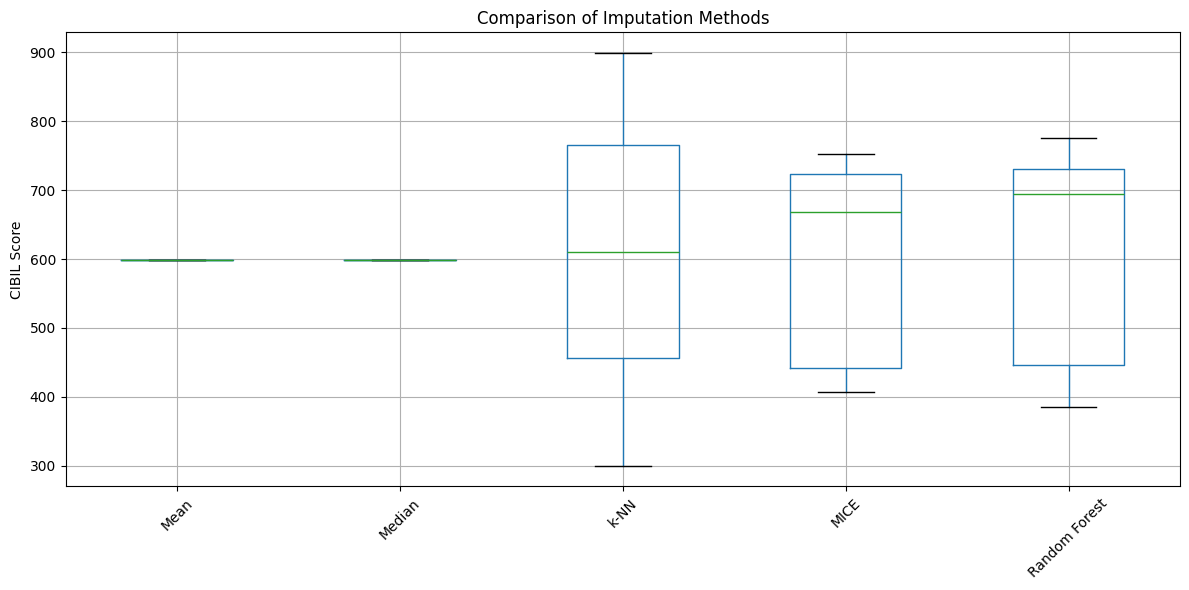

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a results DataFrame comparing all methods
results = pd.DataFrame({
    'Mean': mean_pred[:len(X_missing)].flatten(),
    'Median': median_pred[:len(X_missing)].flatten(),
    'k-NN': knn_imputed_scores,
    'MICE': mice_imputed_scores,
    'Random Forest': y_missing_pred, 
    
})

# Summary statistics
print("🔍 Imputation Results Summary:")
print(results.describe())

# Visualization using box plot
plt.figure(figsize=(12, 6))
results.boxplot()
plt.title("Comparison of Imputation Methods")
plt.ylabel("CIBIL Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


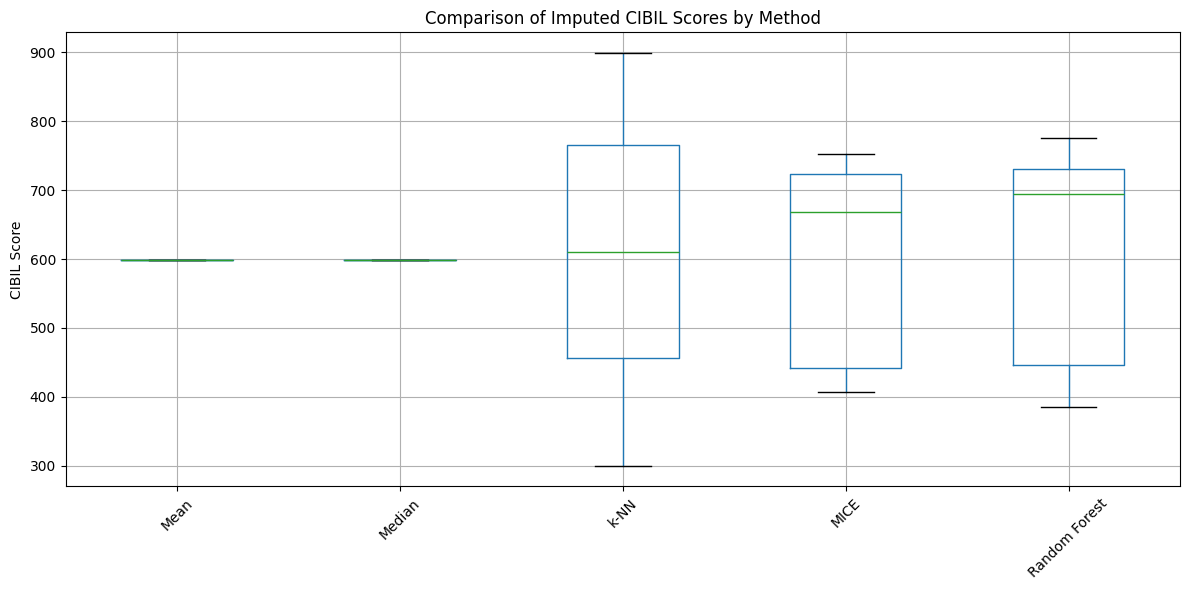

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for imputed values
plt.figure(figsize=(12, 6))
results.boxplot()
plt.title('Comparison of Imputed CIBIL Scores by Method')
plt.ylabel('CIBIL Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4796\3425954819.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4796\3425954819.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


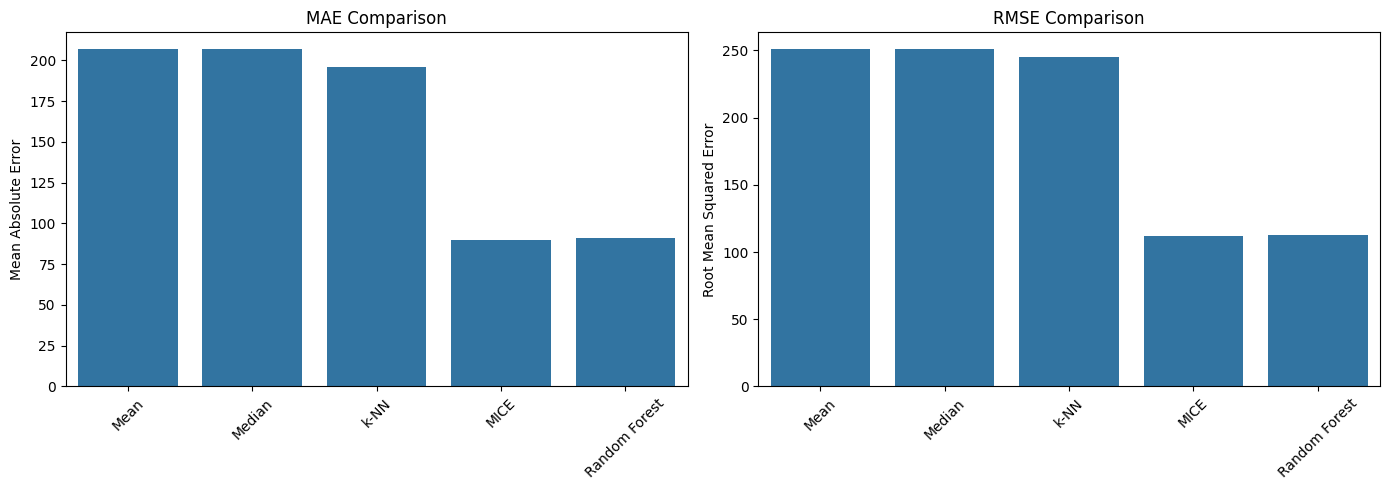

In [33]:
# Define MAE and RMSE values for each model
mae_scores = {
    'Mean': mean_absolute_error(y_TEST, mean_imputed[:len(y_TEST)].flatten()),
    'Median': mean_absolute_error(y_TEST, median_imputed[:len(y_TEST)].flatten()),
    'k-NN': mean_absolute_error(y_TEST, knn_imputed_scores),
    'MICE': mean_absolute_error(y_TEST, mice_imputed_scores),
    'Random Forest': mean_absolute_error(y_TEST, y_missing_pred),
    
}

rmse_scores = {
    'Mean': np.sqrt(mean_squared_error(y_TEST, mean_imputed[:len(y_TEST)].flatten())),
    'Median': np.sqrt(mean_squared_error(y_TEST, median_imputed[:len(y_TEST)].flatten())),
    'k-NN': np.sqrt(mean_squared_error(y_TEST, knn_imputed_scores)),
    'MICE': np.sqrt(mean_squared_error(y_TEST, mice_imputed_scores)),
    'Random Forest': np.sqrt(mean_squared_error(y_TEST, y_missing_pred)),
    
}

# Bar plots for MAE and RMSE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=list(mae_scores.keys()), y=list(mae_scores.values()), ax=axes[0])
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), ax=axes[1])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('Root Mean Squared Error')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
